<a href="https://colab.research.google.com/github/JHU-Kessler-Group/GraftedHybridLatexPaper/blob/main/Figure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Experimental Data from Github Repo

In [1]:
!rm -rf GraftedHybridLatexPaper
!git clone https://github.com/JHU-Kessler-Group/GraftedHybridLatexPaper.git

Cloning into 'GraftedHybridLatexPaper'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 94 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 16.06 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (27/27), done.


### Import Libraries, read in data file, and plot original data

---




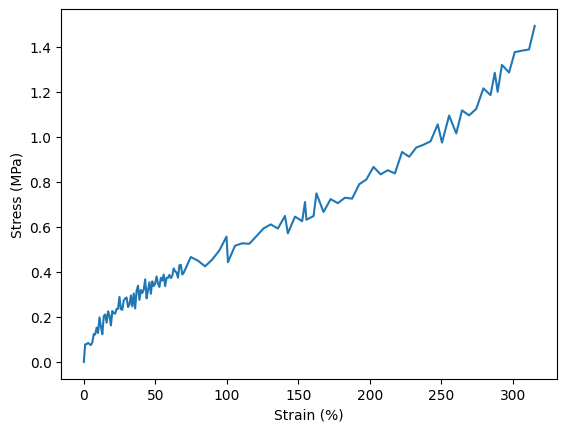

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')
# display(pu_0_0_df.head())

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df)
plt.show()

### Smooth data using LOWESS (Locally Weighted Regression), plot smoothed and original data, plot just smoothed data
Adjust *frac* value in the LOWESS funcion to change smoothing by adjusting the *smooth_level* variable below.  A higher value results in more smoothing.  Typical values for *frac* are from 0.02 to 0.1. Increase slightly if you still see noise.

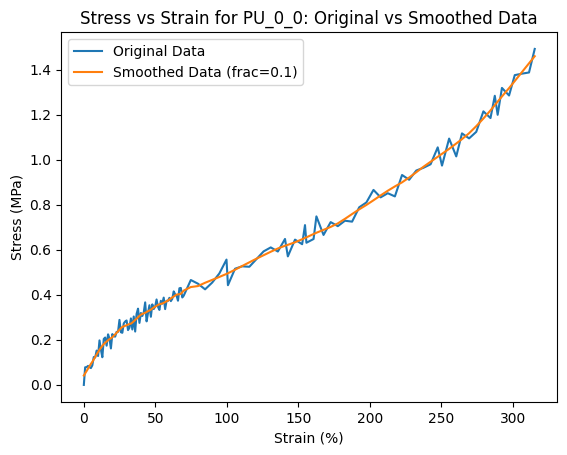

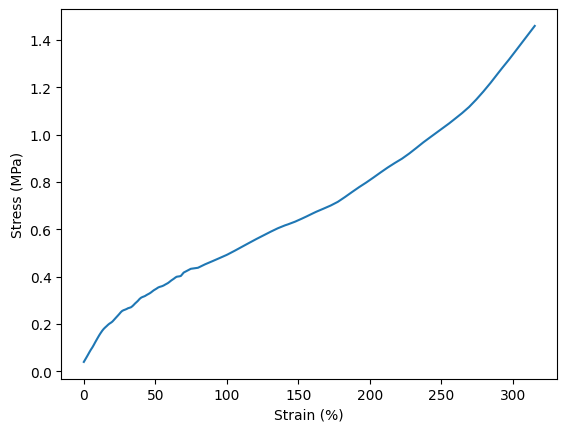

In [3]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smooth_level=0.1 # <-- Adjust this value to change smoothing, 0.02–0.1 typical

smoothed = lowess(pu_0_0_df['Stress (MPa)'],
                  pu_0_0_df['Strain (%)'],
                  frac=smooth_level)

smoothed_data = pd.DataFrame({
    'Strain (%)': smoothed[:, 0],
    'Stress (MPa)': smoothed[:, 1]
})

# Plot the original data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original Data')

#Plot the smoothed data
sns.lineplot(x='Strain (%)',
             y='Stress (MPa)',
             data=smoothed_data,
             label=f'Smoothed Data (frac={smooth_level})')

plt.title('Stress vs Strain for PU_0_0: Original vs Smoothed Data')
plt.legend() # Show legend to distinguish the lines
plt.show()
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data)
plt.show()

### Read in PU_0_0, PU_0.1, PU_0.2, and PU_0.3 CSV files, and plot the original data

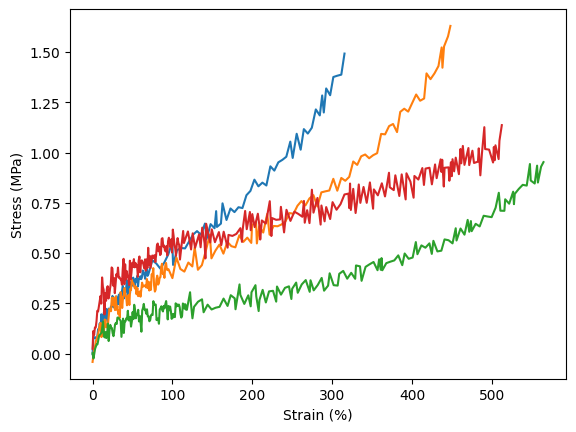

In [4]:

pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')
pu_0_1_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0.1.csv')
pu_0_2_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0.2.csv')
pu_0_3_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0.3.csv')

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df)
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_1_df)
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_2_df)
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_3_df)
plt.show()

### Smooth and plot the smoothed curve with and without the original data

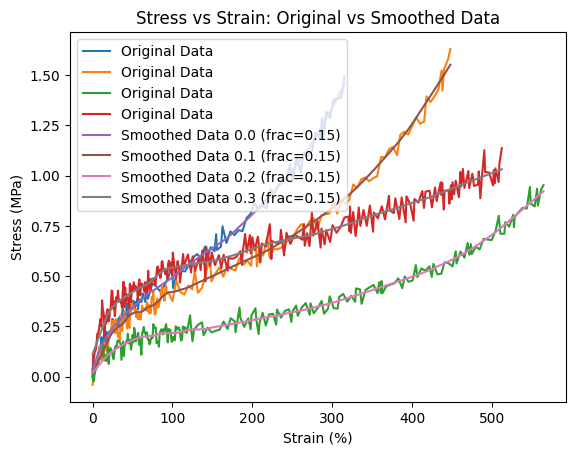

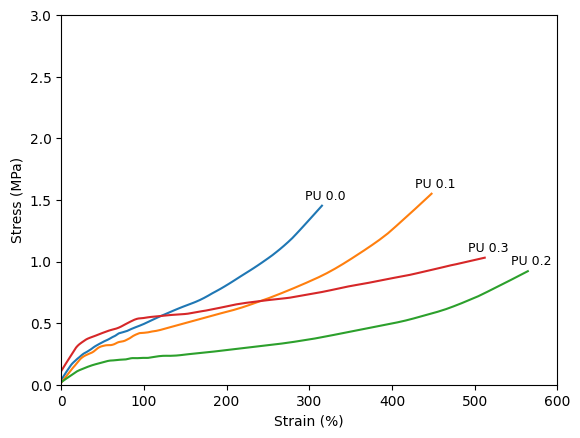

In [21]:
smooth_level=0.15 # <-- Adjust this value to change smoothing, 0.02–0.1 typical

smoothed0 = lowess(pu_0_0_df['Stress (MPa)'],
                  pu_0_0_df['Strain (%)'],
                  frac=smooth_level)

smoothed1 = lowess(pu_0_1_df['Stress (MPa)'],
                  pu_0_1_df['Strain (%)'],
                  frac=smooth_level)

smoothed2 = lowess(pu_0_2_df['Stress (MPa)'],
                  pu_0_2_df['Strain (%)'],
                  frac=smooth_level)

smoothed3 = lowess(pu_0_3_df['Stress (MPa)'],
                  pu_0_3_df['Strain (%)'],
                  frac=smooth_level)

smoothed0_data = pd.DataFrame({
    'Strain (%)': smoothed0[:, 0],
    'Stress (MPa)': smoothed0[:, 1]
})

smoothed1_data = pd.DataFrame({
    'Strain (%)': smoothed1[:, 0],
    'Stress (MPa)': smoothed1[:, 1]
})

smoothed2_data = pd.DataFrame({
    'Strain (%)': smoothed2[:, 0],
    'Stress (MPa)': smoothed2[:, 1]
})

smoothed3_data = pd.DataFrame({
    'Strain (%)': smoothed3[:, 0],
    'Stress (MPa)': smoothed3[:, 1]
})

# Plot the original data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original Data')
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_1_df, label='Original Data')
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_2_df, label='Original Data')
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_3_df, label='Original Data')


#Plot the smoothed data
sns.lineplot(x='Strain (%)',
             y='Stress (MPa)',
             data=smoothed0_data,
             label=f'Smoothed Data 0.0 (frac={smooth_level})')

sns.lineplot(x='Strain (%)',
             y='Stress (MPa)',
             data=smoothed1_data,
             label=f'Smoothed Data 0.1 (frac={smooth_level})')

sns.lineplot(x='Strain (%)',
             y='Stress (MPa)',
             data=smoothed2_data,
             label=f'Smoothed Data 0.2 (frac={smooth_level})')

sns.lineplot(x='Strain (%)',
             y='Stress (MPa)',
             data=smoothed3_data,
             label=f'Smoothed Data 0.3 (frac={smooth_level})')

plt.title('Stress vs Strain: Original vs Smoothed Data')
plt.legend() # Show legend to distinguish the lines
plt.show()

# Create the second plot without legend
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed0_data, color=sns.color_palette()[0])
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed1_data, color=sns.color_palette()[1])
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed2_data, color=sns.color_palette()[2])
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed3_data, color=sns.color_palette()[3])

plt.ylim(0, 3)
plt.xlim(0, 600)

# Add labels to the end of each curve
smoothed_lowess_dataframes = {
    'PU 0.0': smoothed0_data,
    'PU 0.1': smoothed1_data,
    'PU 0.2': smoothed2_data,
    'PU 0.3': smoothed3_data
}

for sample_name, df_smoothed in smoothed_lowess_dataframes.items():
    # Find the last point of each smoothed curve
    last_point = df_smoothed.iloc[-1]
    # Add a small vertical offset to the label's y-position and horizontal offset to the x-position
    plt.text(last_point['Strain (%)'] - 20, last_point['Stress (MPa)'] + 0.05, sample_name, fontsize=9) # Added horizontal offset


plt.show()

### Polynomial fit (degree 5) of the data.

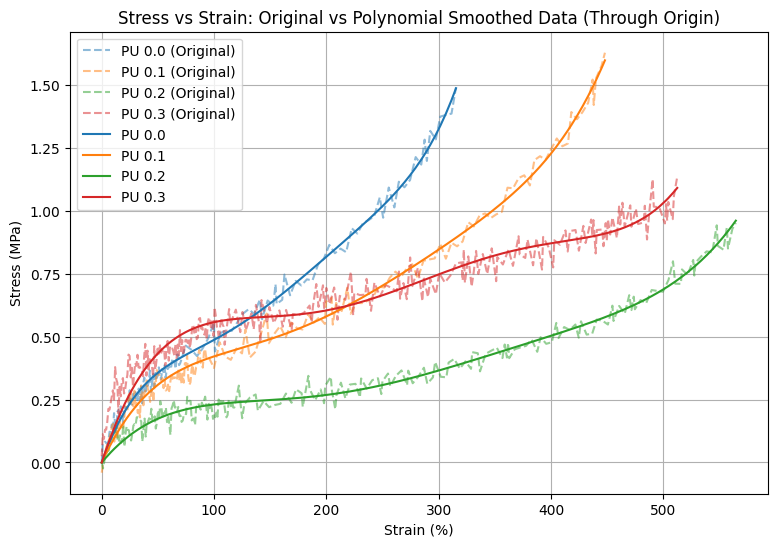

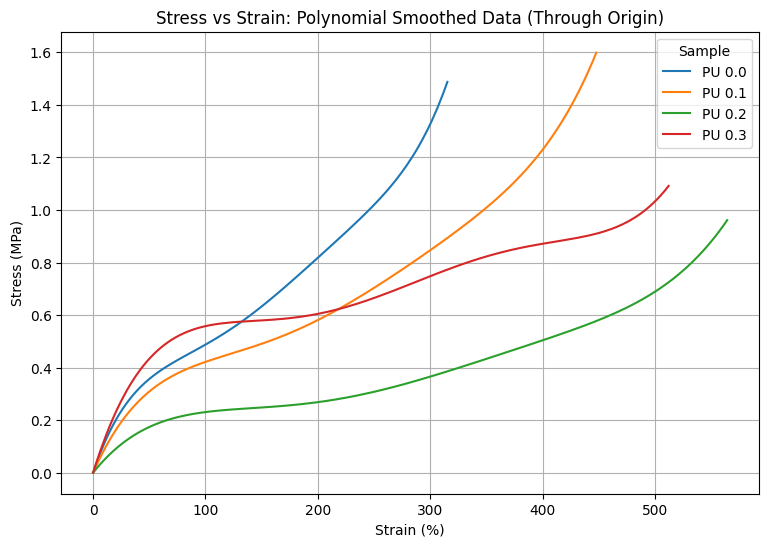

In [13]:
# Polynomial fit through the origin
def poly_fit_through_origin(x, y, degree):
    # To force the polynomial through the origin (0,0), we fit a polynomial
    # of the form y = a_n * x^n + a_{n-1} * x^{n-1} + ... + a_1 * x
    # This is equivalent to fitting y/x = a_n * x^{n-1} + ... + a_1
    # However, dividing by x is problematic when x is close to zero.
    # A more robust approach is to use linear algebra to solve for the coefficients
    # with the constraint that the constant term is zero.

    # Construct the Vandermonde matrix for the polynomial fit without the constant term
    # The columns will be x^degree, x^(degree-1), ..., x^1
    X = np.vander(x, degree + 1)[:, :-1] # Exclude the x^0 (constant) term

    # Use least squares to find the coefficients
    # We want to solve X @ coeffs = y for coeffs
    coeffs, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

    # The coefficients are for x^degree, x^(degree-1), ..., x^1
    # We need to create a polynomial function. np.poly1d expects coefficients
    # in descending powers, including the constant term. Since our constant is 0,
    # we can append a 0 to the coefficients.
    poly_coeffs = np.append(coeffs, 0)

    # Create the polynomial function
    poly = np.poly1d(poly_coeffs)

    return poly

# Apply polynomial fit to all dataframes
poly_degree = 5  # Use the same degree as before

dataframes = {
    'PU 0.0': pu_0_0_df,
    'PU 0.1': pu_0_1_df,
    'PU 0.2': pu_0_2_df,
    'PU 0.3': pu_0_3_df
}

smoothed_poly_dataframes = {}

for name, df in dataframes.items():
    poly_fit = poly_fit_through_origin(df['Strain (%)'], df['Stress (MPa)'], degree=poly_degree)
    # Generate smoothed data points using the polynomial fit
    strain_smoothed = np.insert(df['Strain (%)'].values, 0, 0)
    stress_smoothed = poly_fit(strain_smoothed)

    smoothed_poly_dataframes[name] = pd.DataFrame({
        'Strain (%)': strain_smoothed,
        'Stress (MPa)': stress_smoothed,
        'Sample': name # Add a column to identify the sample
    })

# Concatenate all smoothed dataframes for plotting
all_smoothed_poly_data = pd.concat(smoothed_poly_dataframes.values())

# Plot original and smoothed data for all samples
plt.figure(figsize=(9, 6))

# Plot original data
for name, df in dataframes.items():
    sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=df, label=f'{name} (Original)', linestyle='--', alpha=0.5) # Add alpha for transparency

# Plot smoothed data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', hue='Sample', data=all_smoothed_poly_data)


plt.title('Stress vs Strain: Original vs Polynomial Smoothed Data (Through Origin)')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot only the smoothed data for better clarity
plt.figure(figsize=(9, 6))
sns.lineplot(x='Strain (%)', y='Stress (MPa)', hue='Sample', data=all_smoothed_poly_data)

plt.title('Stress vs Strain: Polynomial Smoothed Data (Through Origin)')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.grid(True)
plt.show()

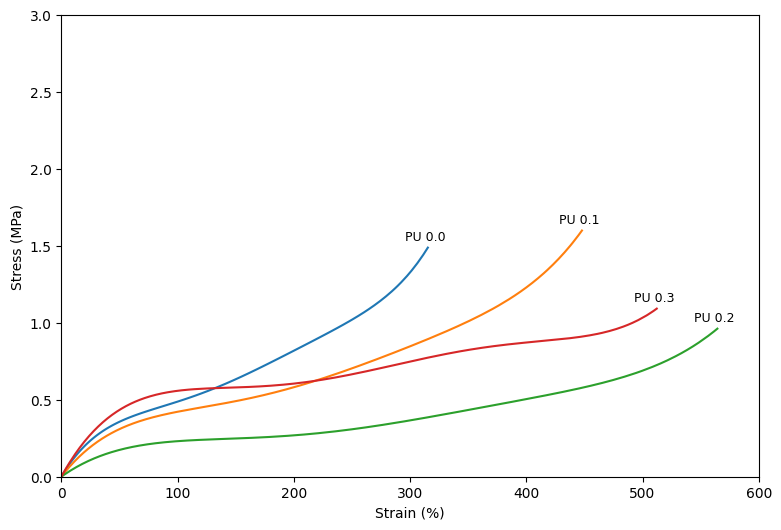

In [20]:
# Plot only the smoothed data with specified limits and no grid
plt.figure(figsize=(9, 6))
sns.lineplot(x='Strain (%)', y='Stress (MPa)', hue='Sample', data=all_smoothed_poly_data)

# plt.title('Stress vs Strain: Polynomial Smoothed Data (Through Origin)')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.grid(False) # Remove internal grid lines
plt.ylim(0, 3) # Set y-axis limit
plt.xlim(0, 600) # Set x-axis limit

# Remove the legend
plt.legend().remove()


# Add labels to the end of each curve
for sample_name, df_smoothed in smoothed_poly_dataframes.items():
    # Find the last point of each smoothed curve
    last_point = df_smoothed.iloc[-1]
    # Add a small vertical offset to the label's y-position and horizontal offset to the x-position
    plt.text(last_point['Strain (%)'] - 20, last_point['Stress (MPa)'] + 0.05, sample_name, fontsize=9) # Added horizontal offset


plt.show()